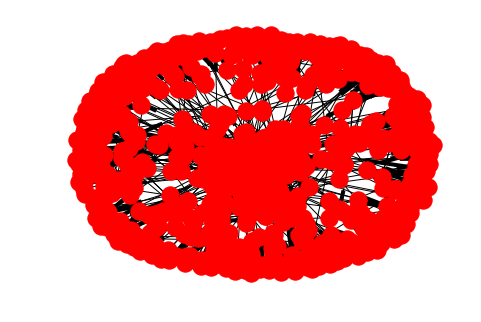

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
G = nx.read_edgelist('trust.txt', nodetype=int, data=(('weight',float),), create_using=nx.DiGraph())
nx.draw(G)
plt.show()

In [2]:
    def unique_elements (list):
        new_list = []

   # Replace the while with a for loop** 

        for i in list:
          if i not in new_list:
            new_list.append(i)


        return (new_list)

In [3]:
df=pd.read_csv('ratings.txt',sep='\s',engine='python')
df.columns = ["user_id", "item_id", "rating"]
df.sort_values(['user_id','item_id'], inplace = True, ascending=True)

In [4]:
trust_rating_common = pd.DataFrame()
user_set=list(map(int,list(df['user_id'])))
item_set=list(map(int,list(df['item_id'])))
rating=list(map(int,list(df['rating'])))
trust_user=G.nodes(data=False)
user=list(set(user_set).intersection(trust_user))

In [5]:
for i in user:
    trust_rating_common = trust_rating_common.append(df[df.user_id == i])

In [6]:
trust_rating_common.count()

user_id    18662
item_id    18662
rating     18662
dtype: int64

In [7]:
trust_rating_common.tail()

,user_id,item_id,rating
35494,1508,669,1.0
35495,1508,686,2.5
35470,1508,693,3.5
35477,1508,751,1.0
35496,1508,806,3.5


In [8]:
trust_rating_common.head()

,user_id,item_id,rating
12,2,13,2.0
209,4,1,3.0
207,4,3,2.5
211,4,17,0.5
206,4,205,3.0


Creation of Bipartite graph from the rating data of common users (users present in both rating and trust)


In [9]:
rating_bipartite_G = nx.Graph()
common_users_itemlist =trust_rating_common['item_id'].unique()
common_users_itemlist.sort()
item_set = ['NA']*len(common_users_itemlist);
for i in range(len(common_users_itemlist)):
    item_set[i] = 'i_'+str(common_users_itemlist[i])

In [10]:
print(item_set)

['i_1', 'i_2', 'i_3', 'i_4', 'i_5', 'i_6', 'i_7', 'i_8', 'i_9', 'i_10', 'i_11', 'i_12', 'i_13', 'i_14', 'i_15', 'i_16', 'i_17', 'i_18', 'i_19', 'i_20', 'i_21', 'i_22', 'i_24', 'i_25', 'i_26', 'i_28', 'i_29', 'i_30', 'i_31', 'i_32', 'i_34', 'i_35', 'i_36', 'i_37', 'i_38', 'i_39', 'i_40', 'i_41', 'i_42', 'i_43', 'i_44', 'i_45', 'i_46', 'i_48', 'i_49', 'i_50', 'i_51', 'i_52', 'i_53', 'i_54', 'i_55', 'i_56', 'i_57', 'i_58', 'i_59', 'i_60', 'i_61', 'i_62', 'i_63', 'i_64', 'i_65', 'i_66', 'i_67', 'i_69', 'i_70', 'i_71', 'i_72', 'i_73', 'i_75', 'i_76', 'i_77', 'i_78', 'i_80', 'i_81', 'i_82', 'i_83', 'i_84', 'i_85', 'i_86', 'i_87', 'i_88', 'i_89', 'i_90', 'i_91', 'i_92', 'i_93', 'i_94', 'i_95', 'i_96', 'i_97', 'i_98', 'i_99', 'i_100', 'i_102', 'i_103', 'i_105', 'i_106', 'i_107', 'i_108', 'i_110', 'i_112', 'i_113', 'i_114', 'i_115', 'i_116', 'i_117', 'i_118', 'i_119', 'i_120', 'i_121', 'i_122', 'i_123', 'i_124', 'i_125', 'i_126', 'i_127', 'i_128', 'i_129', 'i_130', 'i_131', 'i_132', 'i_134', 'i

In [11]:
user_set = ['NA']*len(user);
for i in range(len(user)):
    user_set[i] = 'u_'+str(user[i])

In [12]:
print(user_set)

['u_2', 'u_4', 'u_5', 'u_6', 'u_7', 'u_12', 'u_13', 'u_15', 'u_16', 'u_18', 'u_20', 'u_23', 'u_26', 'u_27', 'u_29', 'u_32', 'u_35', 'u_36', 'u_38', 'u_42', 'u_43', 'u_47', 'u_51', 'u_57', 'u_58', 'u_60', 'u_61', 'u_62', 'u_63', 'u_66', 'u_71', 'u_74', 'u_78', 'u_79', 'u_80', 'u_83', 'u_84', 'u_85', 'u_86', 'u_88', 'u_89', 'u_90', 'u_91', 'u_92', 'u_93', 'u_94', 'u_95', 'u_96', 'u_99', 'u_100', 'u_103', 'u_104', 'u_106', 'u_109', 'u_110', 'u_112', 'u_114', 'u_115', 'u_116', 'u_120', 'u_123', 'u_125', 'u_129', 'u_134', 'u_135', 'u_141', 'u_143', 'u_146', 'u_147', 'u_149', 'u_150', 'u_151', 'u_154', 'u_159', 'u_160', 'u_161', 'u_162', 'u_163', 'u_164', 'u_165', 'u_166', 'u_167', 'u_168', 'u_169', 'u_170', 'u_171', 'u_173', 'u_174', 'u_175', 'u_177', 'u_182', 'u_188', 'u_191', 'u_192', 'u_193', 'u_195', 'u_196', 'u_199', 'u_200', 'u_201', 'u_208', 'u_210', 'u_213', 'u_215', 'u_217', 'u_220', 'u_221', 'u_222', 'u_223', 'u_224', 'u_226', 'u_227', 'u_228', 'u_230', 'u_231', 'u_232', 'u_234', 

In [13]:
rating_bipartite_G = nx.Graph()
rating_bipartite_G.add_nodes_from(user_set, bipartite =0)
rating_bipartite_G.add_nodes_from(item_set, bipartite =1)

In [14]:
for i in range(len(trust_rating_common)):
    rating_bipartite_G.add_edge('u_'+str(trust_rating_common.iloc[i,0]),'i_'+str(trust_rating_common.iloc[i,1]), weight=float(trust_rating_common.iloc[i,2]))

In [18]:
item={}
item_comp={}
item_list=[]
user_key=[]
path_key=[]
a=[2]
b=[104]
for i in user:
    for j in user:
        user_key=[]
        item={}
        f_ele='u_'+str(trust_rating_common.iloc[i,0])
        s_ele='u_'+str(trust_rating_common.iloc[j,0])
        user_key=[f_ele,s_ele]
        for path in nx.all_simple_paths(G, source=i, target=j, cutoff=4):
            path_key=[]
            item_list=[]
            path_key=list(path[1:-1])
            for k in path[1:-1]:
                item_list=item_list + list(rating_bipartite_G.neighbors('u_'+str(trust_rating_common.iloc[k,0])))
                item_list=unique_elements(item_list)
            item[tuple(path_key)]=item_list
              
        item_comp[tuple(user_key)]=item

In [17]:
for i in item_comp:
    print (i)
    print(item_comp[i])
    break

('u_4', 'u_4')
{(1192, 6): ['i_1', 'i_2', 'i_3', 'i_4', 'i_5', 'i_6', 'i_7', 'i_8', 'i_9', 'i_10', 'i_11', 'i_12', 'i_13', 'i_17', 'i_84', 'i_121', 'i_205', 'i_206', 'i_207', 'i_210', 'i_211', 'i_212', 'i_213', 'i_214', 'i_215', 'i_216', 'i_217', 'i_219', 'i_220', 'i_233', 'i_234', 'i_235', 'i_236', 'i_239', 'i_241', 'i_243', 'i_244', 'i_245', 'i_246', 'i_247', 'i_248', 'i_249', 'i_250', 'i_251', 'i_252', 'i_253', 'i_254', 'i_255', 'i_256', 'i_257'], (1192, 938, 782, 6): ['i_1', 'i_2', 'i_3', 'i_4', 'i_5', 'i_6', 'i_7', 'i_8', 'i_9', 'i_10', 'i_11', 'i_12', 'i_13', 'i_17', 'i_84', 'i_121', 'i_205', 'i_206', 'i_207', 'i_210', 'i_211', 'i_212', 'i_213', 'i_214', 'i_215', 'i_216', 'i_217', 'i_219', 'i_220', 'i_233', 'i_234', 'i_235', 'i_236', 'i_239', 'i_241', 'i_243', 'i_244', 'i_245', 'i_246', 'i_247', 'i_248', 'i_249', 'i_250', 'i_251', 'i_252', 'i_253', 'i_254', 'i_255', 'i_256', 'i_257']}


In [ ]:
r=[]
for i in user:
    r[i]=len(rating_bipartite_G.neighbors(i)/len(user_set))
    novelty[i]=math.log((r[i])[,2])

In [ ]:
a=nx.all_pairs_shortest_path(rating_bipartite_G,cutoff=4)
class Generator:
    def __init__(self, gen):
        self.gen = gen

    def __iter__(self):
        self.value = yield from self.gen
d1={}
path=Generator(a)
for i in path:
    items=tuple(i[1].items())
    items=sorted(items,key=lambda x: len(x[1]),reverse=True)
    l1=[]
    for i in items:
        if len(i[1])>=3:
            l1+= i[1][1:-1]  #collecting nodes in the path of two nodes
            l1=(list(set(l1))) #removing duplicates
        else:
            continue
        d1[items[0][1][0]]=l1
        # remove comment from following lines to get an idea what this code is doing
        #print d1
        #break